In [22]:
#import necessary lib.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [23]:
pwd

'C:\\Users\\Lenovo\\Desktop\\OneDrive\\ISI\\brain tumour'

In [24]:
# paths to the training and testing directories
train_data_dir = 'C:\\Users\\Lenovo\\Desktop\\OneDrive\\ISI\\brain tumour\\Training'
test_data_dir = 'C:\\Users\\Lenovo\\Desktop\\OneDrive\\ISI\\brain tumour\\Testing'


In [25]:
#height and width
img_width, img_height = 128, 128


In [26]:
#no of classes
num_classes = 4


In [27]:
# Number of training and testing samples
num_train_samples = 5712
num_test_samples = 1311

In [28]:
# Set up data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [29]:
# Set up data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1/255)

In [30]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),batch_size=32,class_mode='categorical')


Found 5712 images belonging to 4 classes.


In [31]:
# Load test data without augmentation
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(img_width, img_height),batch_size=32,class_mode='categorical',shuffle=False)


Found 1311 images belonging to 4 classes.


In [32]:
#build the cnn model architechure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [33]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
#train the model
history = model.fit(train_generator,steps_per_epoch=num_train_samples // 32,epochs=100)


Epoch 1/100
178/178 [==============================] - 141s 769ms/step - loss: 0.4133 - accuracy: 0.5697
Epoch 2/100
178/178 [==============================] - 79s 443ms/step - loss: 0.2671 - accuracy: 0.7746
Epoch 3/100
178/178 [==============================] - 79s 443ms/step - loss: 0.2056 - accuracy: 0.8241
Epoch 4/100
178/178 [==============================] - 89s 500ms/step - loss: 0.1705 - accuracy: 0.8651
Epoch 5/100
178/178 [==============================] - 93s 523ms/step - loss: 0.1443 - accuracy: 0.8863
Epoch 6/100
178/178 [==============================] - 94s 528ms/step - loss: 0.1228 - accuracy: 0.9060
Epoch 7/100
178/178 [==============================] - 88s 494ms/step - loss: 0.1040 - accuracy: 0.9210
Epoch 8/100
178/178 [==============================] - 90s 508ms/step - loss: 0.0871 - accuracy: 0.9373
Epoch 9/100
178/178 [==============================] - 89s 499ms/step - loss: 0.0752 - accuracy: 0.9435
Epoch 10/100
178/178 [==============================] - 89s 498

178/178 [==============================] - 144s 807ms/step - loss: 0.0035 - accuracy: 0.9977
Epoch 79/100
178/178 [==============================] - 142s 798ms/step - loss: 0.0107 - accuracy: 0.9928
Epoch 80/100
178/178 [==============================] - 148s 829ms/step - loss: 0.0111 - accuracy: 0.9928
Epoch 81/100
178/178 [==============================] - 146s 818ms/step - loss: 0.0098 - accuracy: 0.9942
Epoch 82/100
178/178 [==============================] - 149s 838ms/step - loss: 0.0083 - accuracy: 0.9940
Epoch 83/100
178/178 [==============================] - 148s 830ms/step - loss: 0.0103 - accuracy: 0.9931
Epoch 84/100
178/178 [==============================] - 161s 902ms/step - loss: 0.0074 - accuracy: 0.9949
Epoch 85/100
178/178 [==============================] - 163s 914ms/step - loss: 0.0057 - accuracy: 0.9954
Epoch 86/100
178/178 [==============================] - 145s 812ms/step - loss: 0.0096 - accuracy: 0.9933
Epoch 87/100
178/178 [==============================] - 82s

In [35]:
#evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_generator,steps=num_test_samples // 32)
print("Test loss:", loss)
print("Test accuracy:",accuracy)

40/40 [==============================] - 19s 463ms/step - loss: 0.0446 - accuracy: 0.9867
Test loss: 0.044565971940755844
Test accuracy: 0.9867187738418579


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [52]:
img = cv2.imread(r'C:\Users\Lenovo\Desktop\OneDrive\ISI\brain tumour\Training\notumor\Tr-no_0037.jpg')
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array.shape

(128, 128, 3)

In [53]:
img_array = img_array.reshape(1,128,128,3)
img_array.shape

(1, 128, 128, 3)

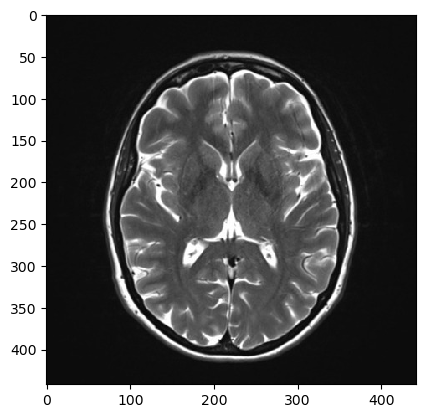

In [54]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\Lenovo\Desktop\OneDrive\ISI\brain tumour\Training\notumor\Tr-no_0037.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [55]:
a = model.predict(img_array)
indices = a.argmax()
indices
 # Write names based on predicted class
if indices == 0:
    name = 'Glioma Tumor'
elif indices == 1:
    name = 'Meningioma Tumor'
elif indices == 2:
    name = 'no tumour'
elif indices == 3:
    name = 'pituitary tumour'
else:
        name = 'unknown'
print(name)

1/1 [==============================] - 0s 25ms/step
no tumour
